# Self-Driving Car Engineer Nanodegree

## Project: **Advanced Lane Finding** 

### 03.Use color transforms, gradients, etc., to create a thresholded binary image.

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

### Load each undistorted image and Use color transforms, gradients.

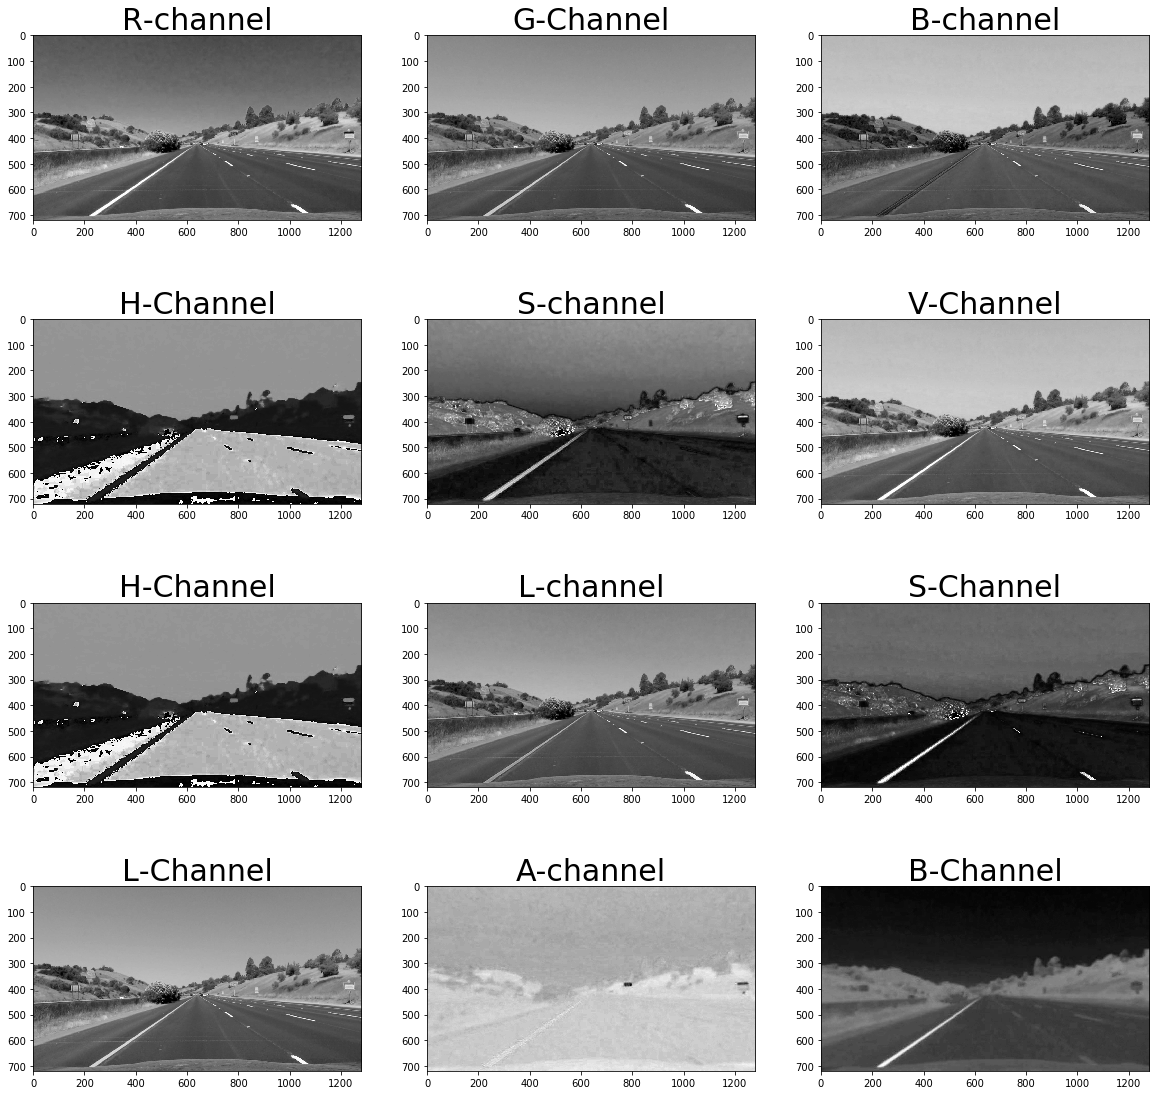

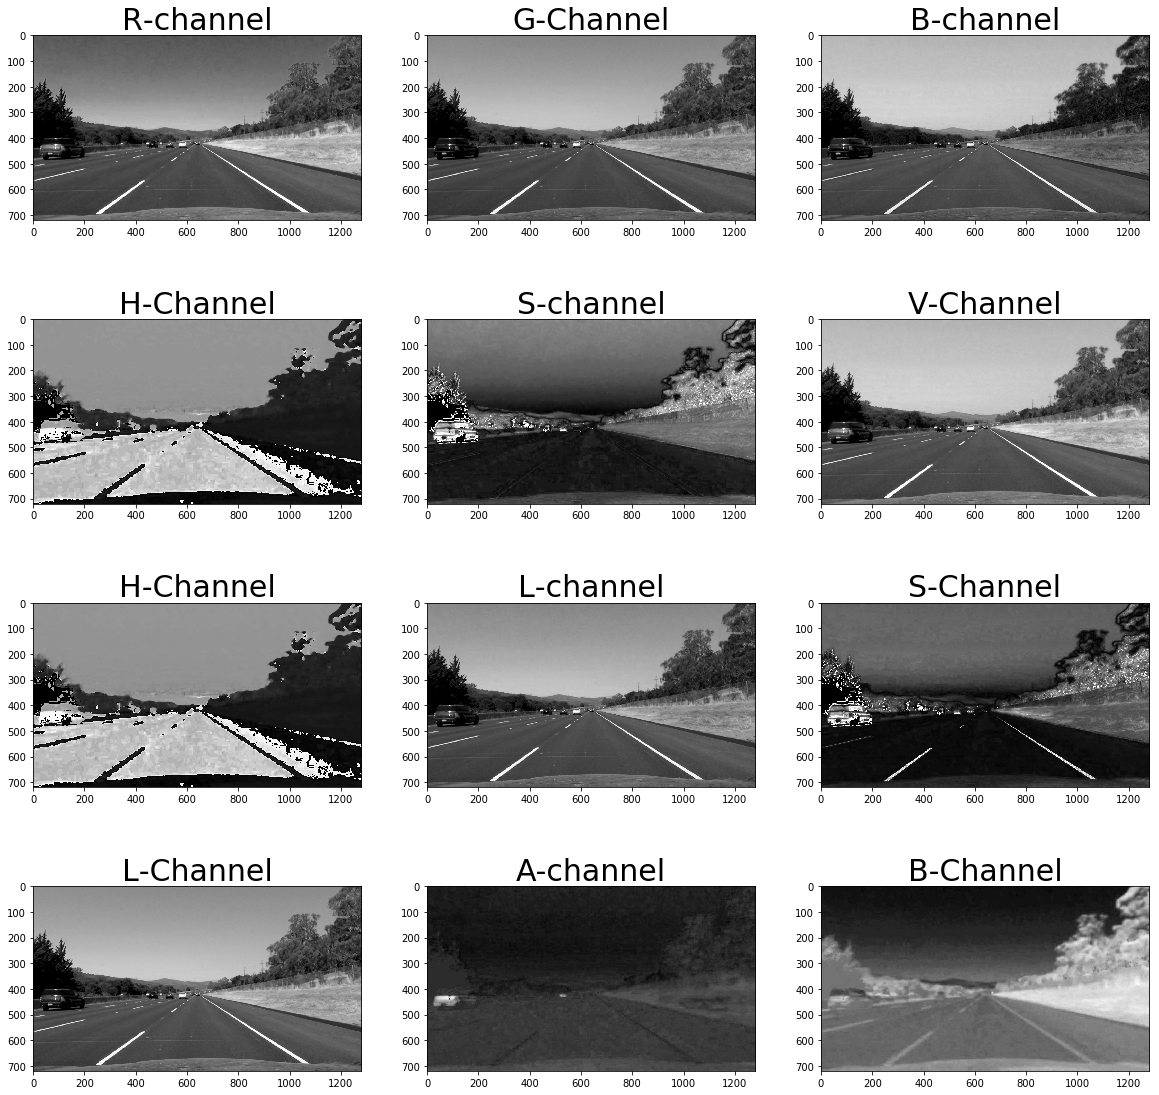

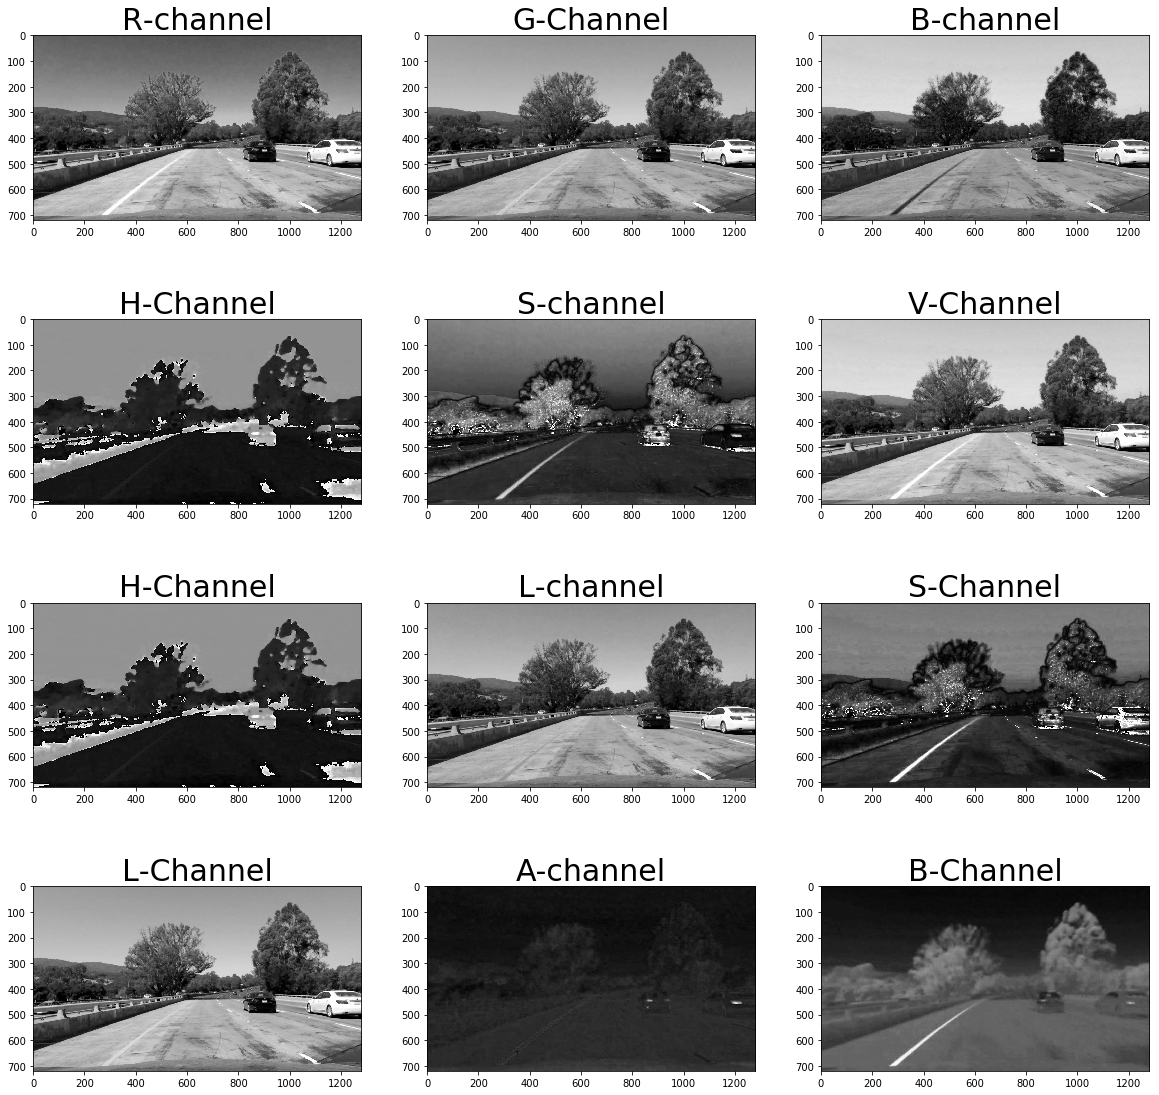

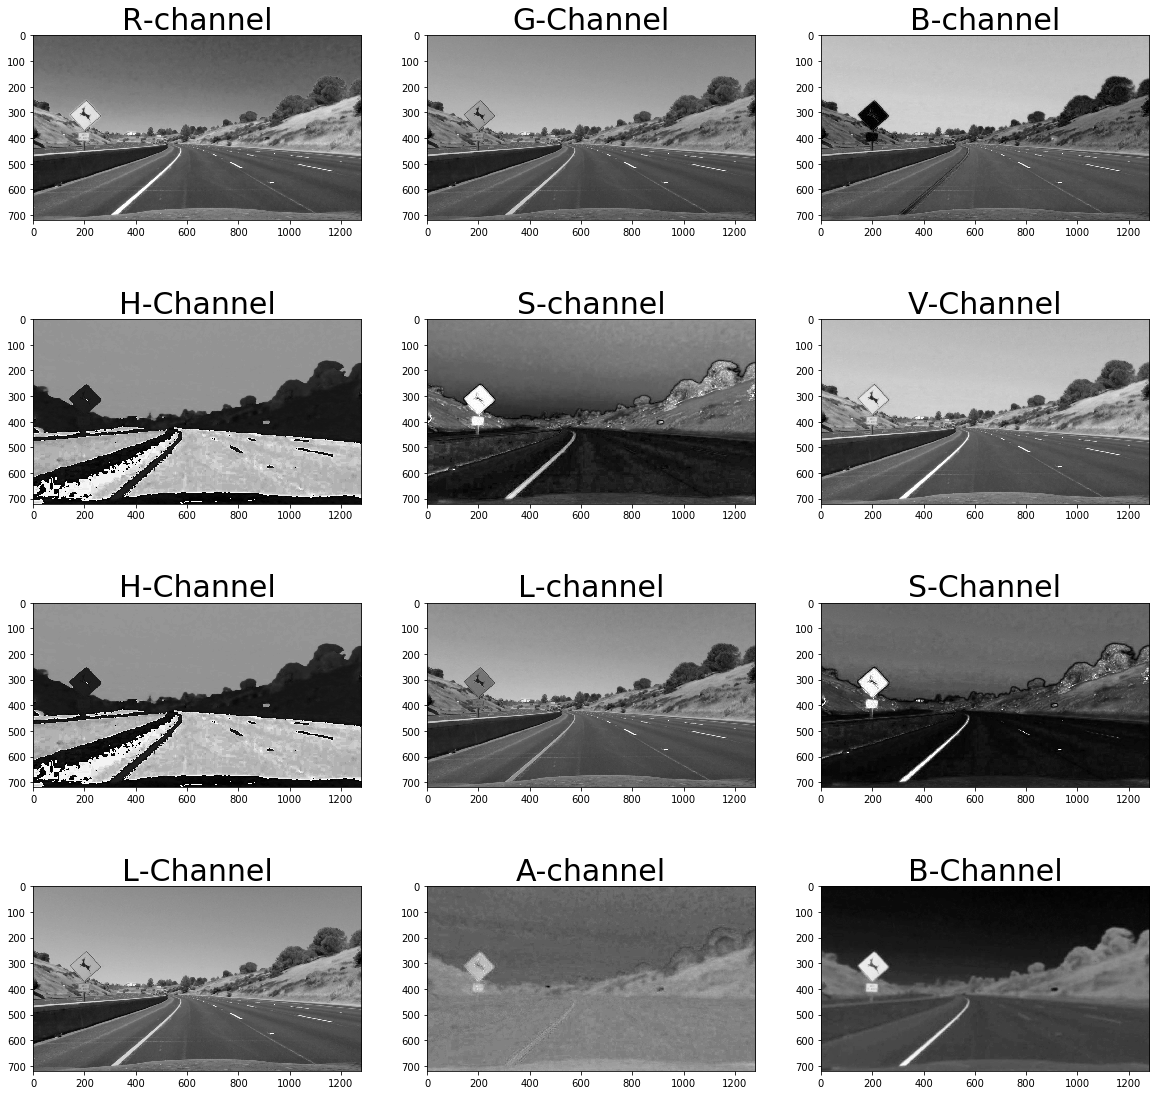

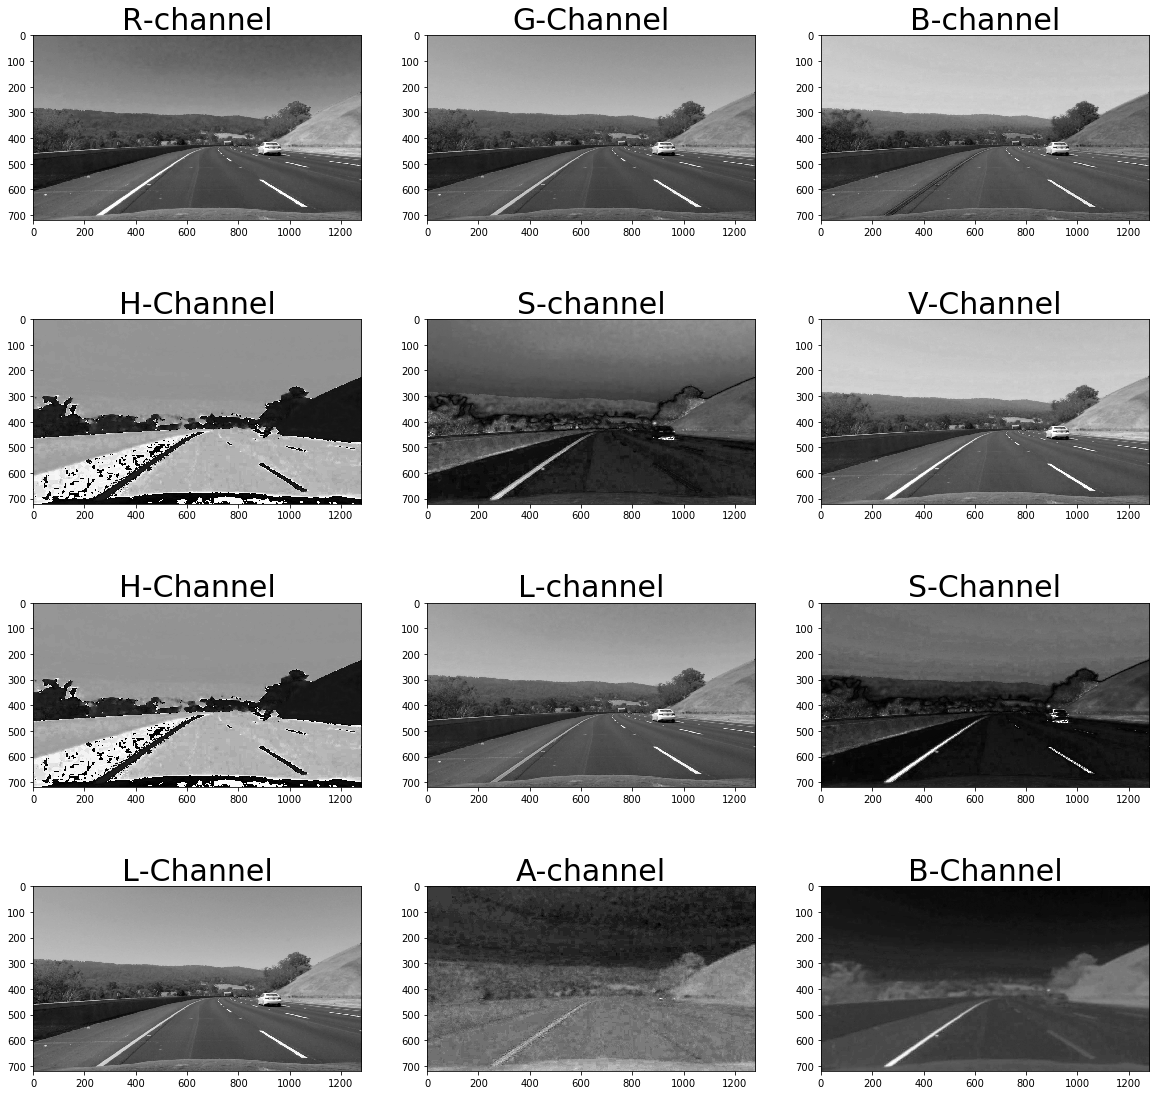

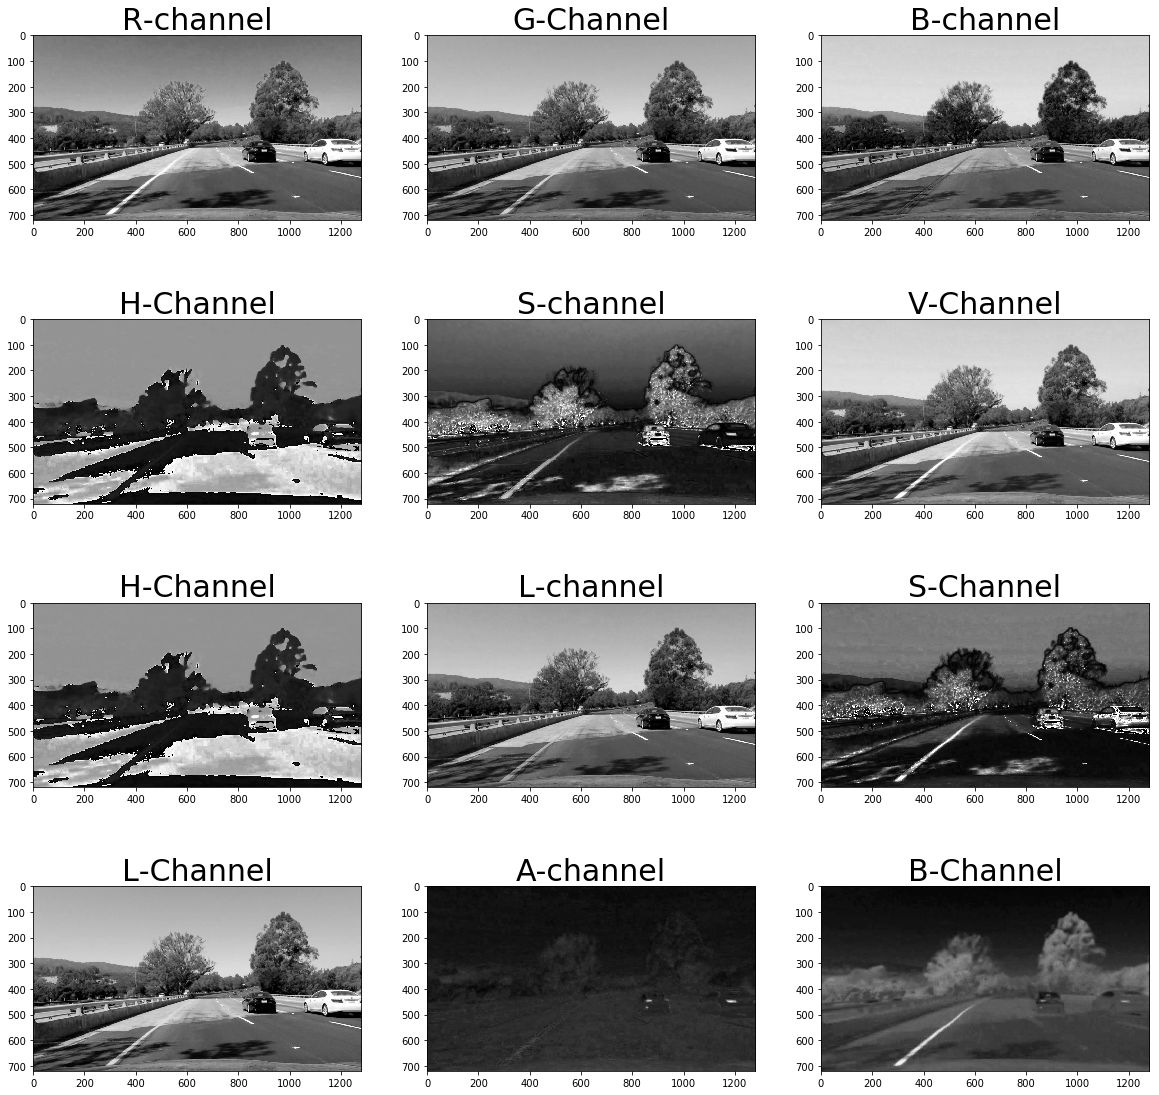

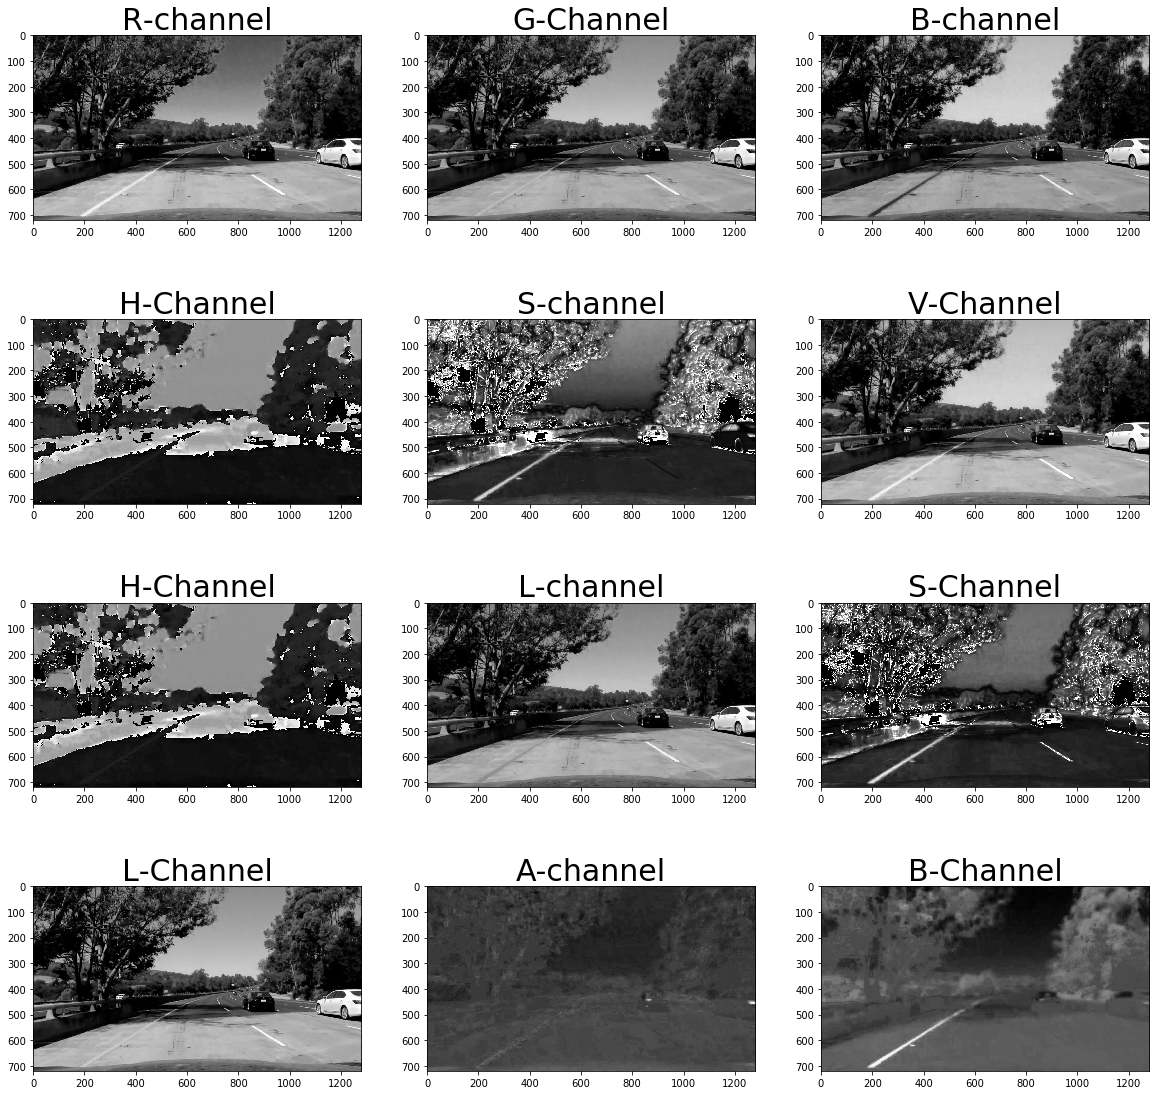

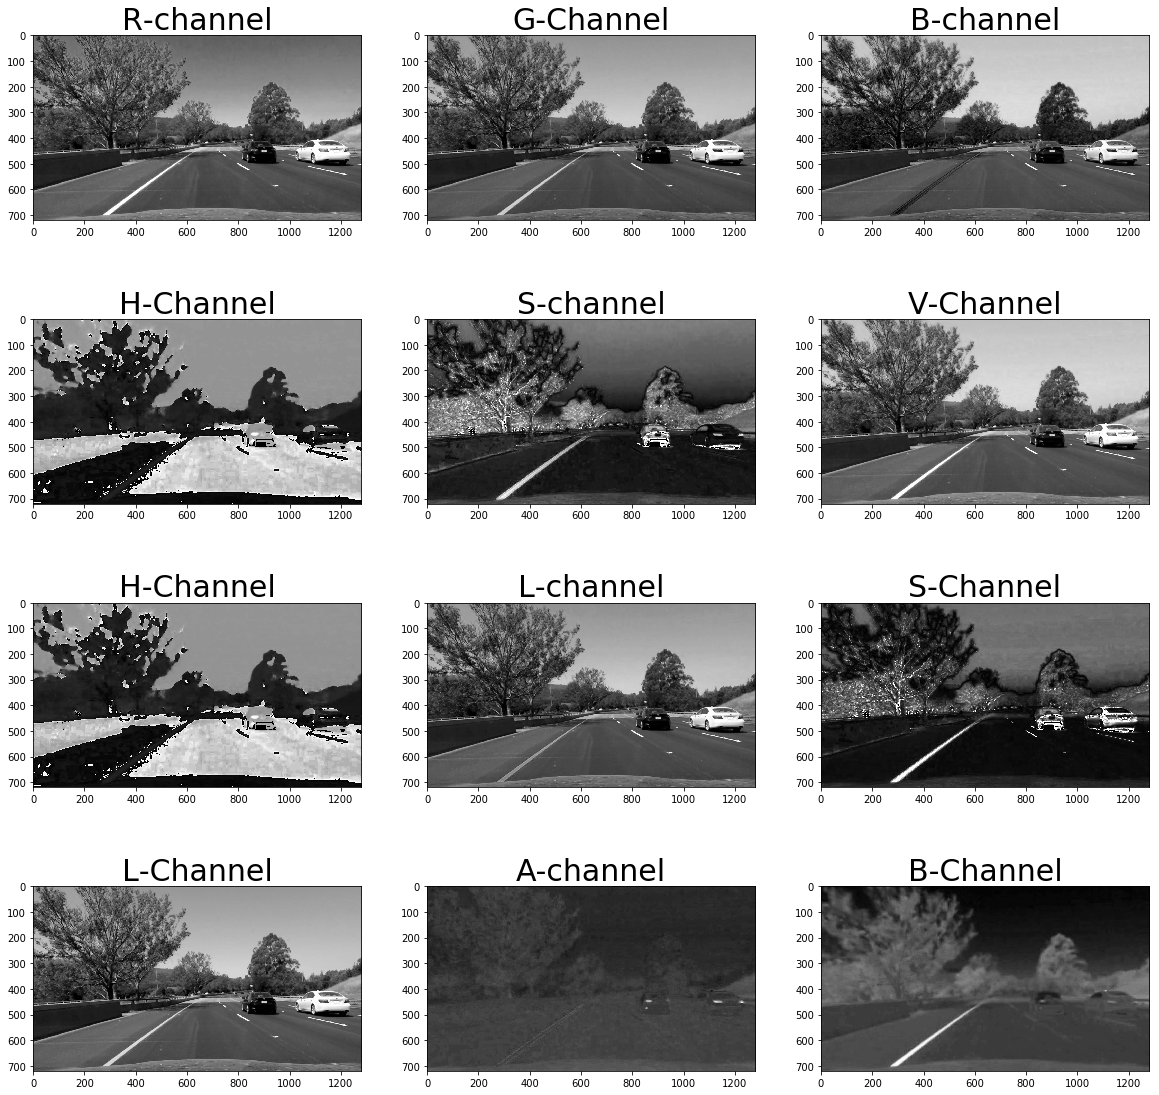

In [2]:
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    #Show Result
    fig, axs = plt.subplots(4,3, figsize=(20, 20))
    axs = axs.ravel()

    axs[0].imshow(image[:,:,0], cmap='gray')
    axs[0].set_title('R-channel', fontsize=30)
    axs[1].imshow(image[:,:,1], cmap='gray')
    axs[1].set_title('G-Channel', fontsize=30)
    axs[2].imshow(image[:,:,2], cmap='gray')
    axs[2].set_title('B-channel', fontsize=30)

    image_HSV = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    axs[3].imshow(image_HSV[:,:,0], cmap='gray')
    axs[3].set_title('H-Channel', fontsize=30)
    axs[4].imshow(image_HSV[:,:,1], cmap='gray')
    axs[4].set_title('S-channel', fontsize=30)
    axs[5].imshow(image_HSV[:,:,2], cmap='gray')
    axs[5].set_title('V-Channel', fontsize=30)

    image_HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    axs[6].imshow(image_HLS[:,:,0], cmap='gray')
    axs[6].set_title('H-Channel', fontsize=30)
    axs[7].imshow(image_HLS[:,:,1], cmap='gray')
    axs[7].set_title('L-channel', fontsize=30)
    axs[8].imshow(image_HLS[:,:,2], cmap='gray')
    axs[8].set_title('S-Channel', fontsize=30)
    
    image_LAB = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    axs[9].imshow(image_LAB[:,:,0], cmap='gray')
    axs[9].set_title('L-Channel', fontsize=30)
    axs[10].imshow(image_LAB[:,:,1], cmap='gray')
    axs[10].set_title('A-channel', fontsize=30)
    axs[11].imshow(image_LAB[:,:,2], cmap='gray')
    axs[11].set_title('B-Channel', fontsize=30)

### SO it is obvious that HLS should be the best filtering option.
### Test HLS threshold range

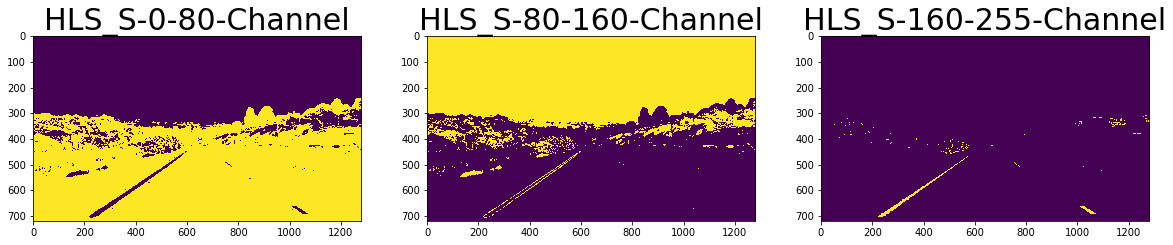

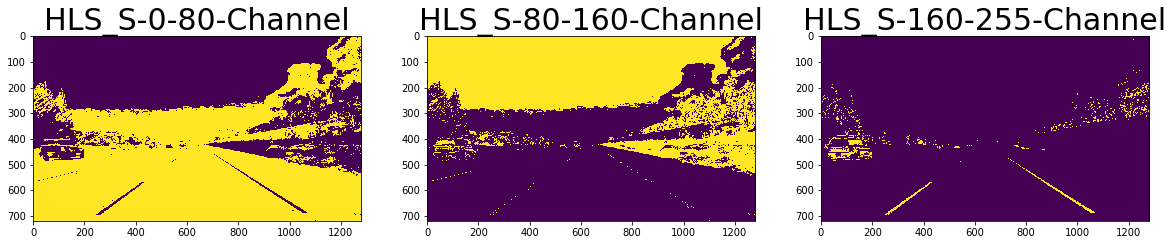

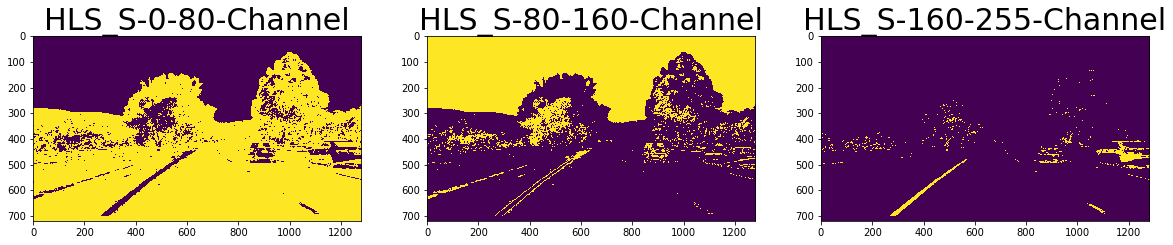

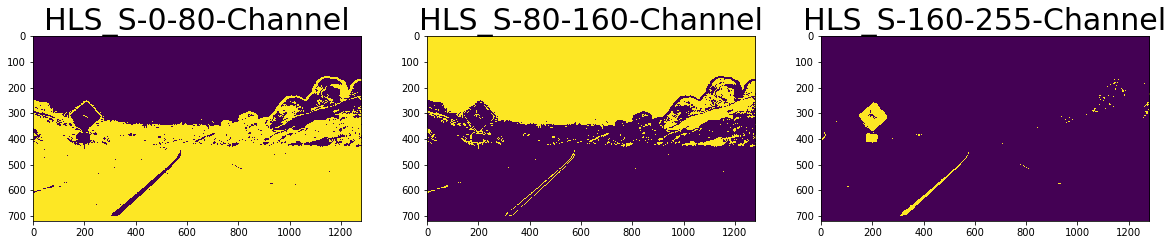

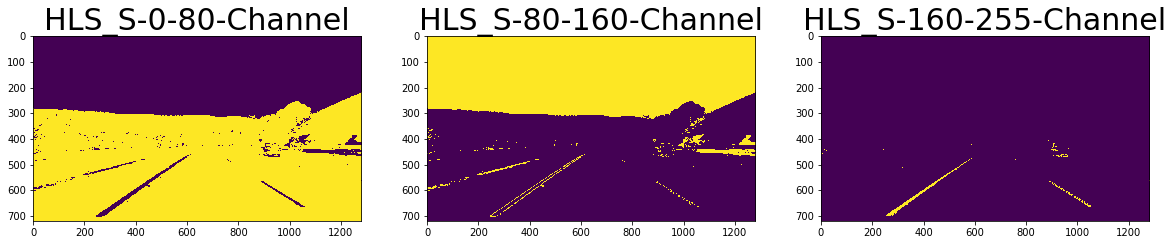

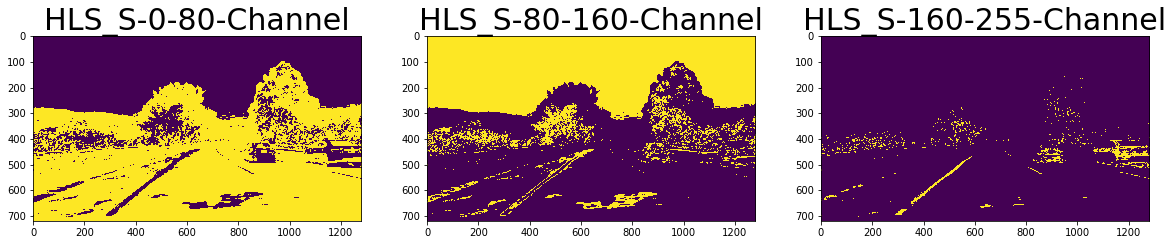

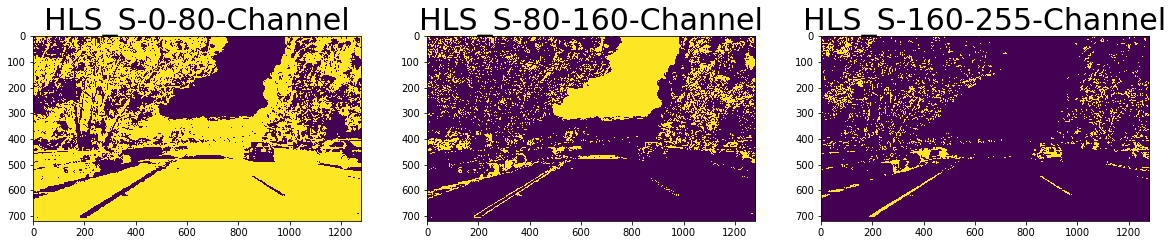

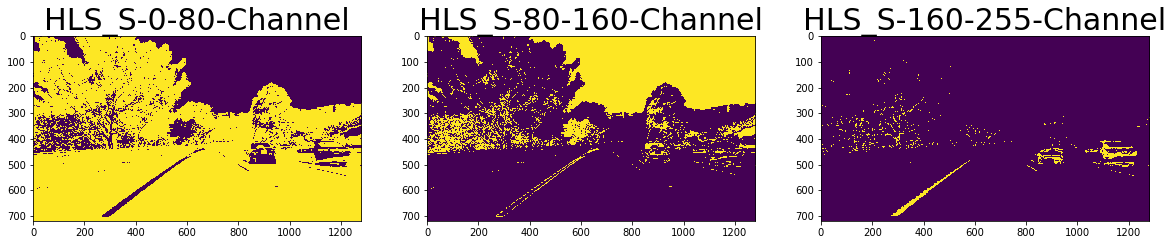

In [3]:
def HLS_S_threshold(img, threshold=(200, 255)):

    HLS_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    HLS_S_img = HLS_img[:,:,2]
    
    HLS_S_img = HLS_S_img*(255/np.max(HLS_S_img))
    
    binary_output = np.zeros_like(HLS_S_img)
    
    binary_output[(HLS_S_img > threshold[0]) & (HLS_S_img <= threshold[1])] = 1

    return binary_output
"""
def HLS_L_threshold(img, threshold=(200, 255)):

    HLS_img = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    HLS_L_img = HLS_img[:,:,1]
    
    HLS_L_img = HLS_L_img*(255/np.max(HLS_L_img))
    
    binary_output = np.zeros_like(HLS_L_img)
    
    binary_output[(HLS_L_img > threshold[0]) & (HLS_L_img <= threshold[1])] = 1

    return binary_output
"""
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    
    #It is best to test the threshold of that section.
    #Show Result
    fig, axs = plt.subplots(1,3, figsize=(20, 9))
    axs = axs.ravel()
    axs[0].imshow(HLS_S_threshold(image, threshold=(0, 80)))
    axs[0].set_title('HLS_S-0-80-Channel', fontsize=30)
    axs[1].imshow(HLS_S_threshold(image, threshold=(80, 160)))
    axs[1].set_title('HLS_S-80-160-Channel', fontsize=30)
    axs[2].imshow(HLS_S_threshold(image, threshold=(160, 255)))
    axs[2].set_title('HLS_S-160-255-Channel', fontsize=30)
    
    #After testing, you can know that 160 is the most suitable.
    
    

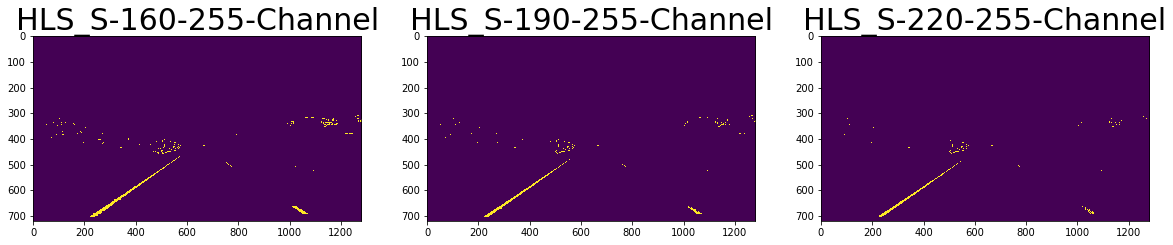

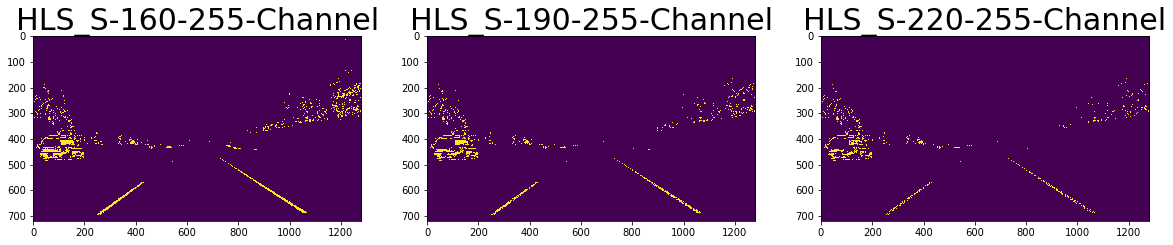

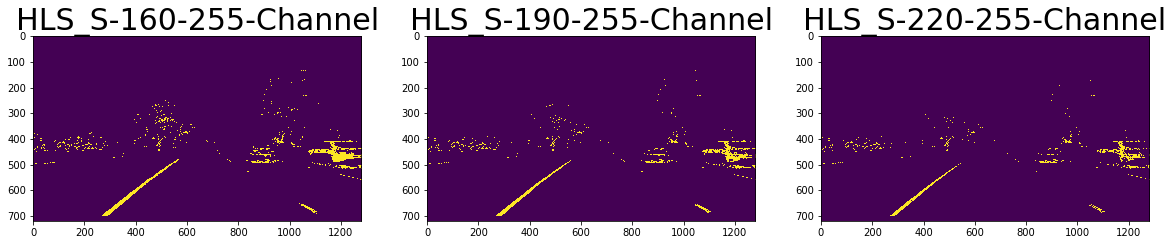

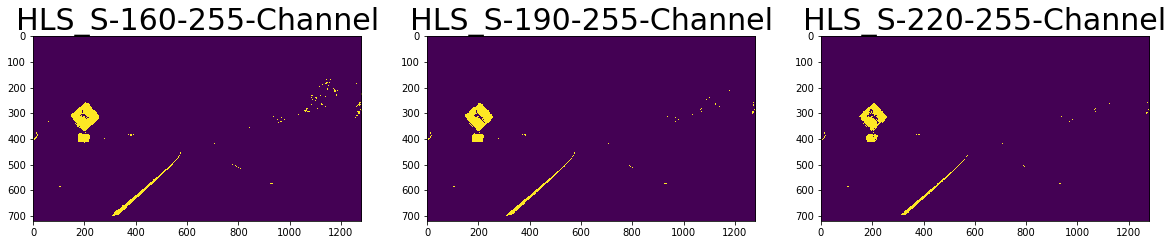

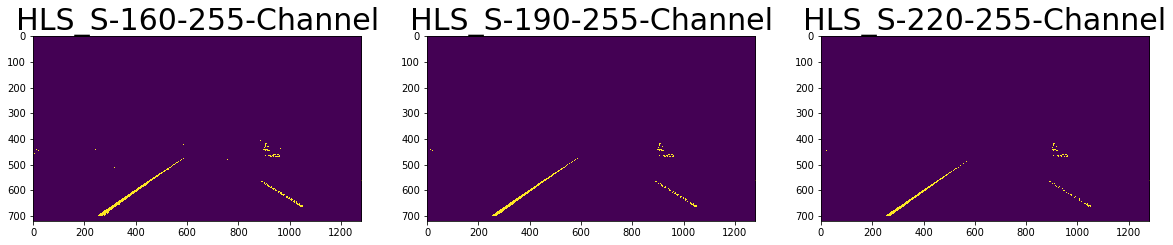

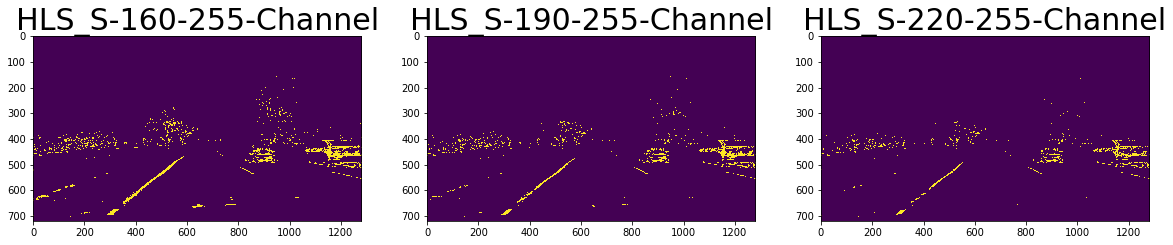

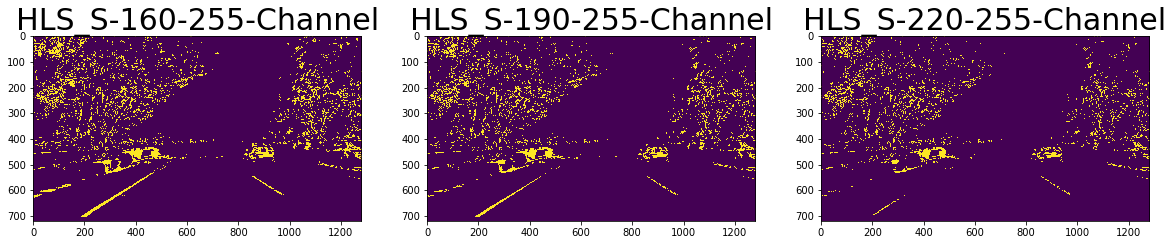

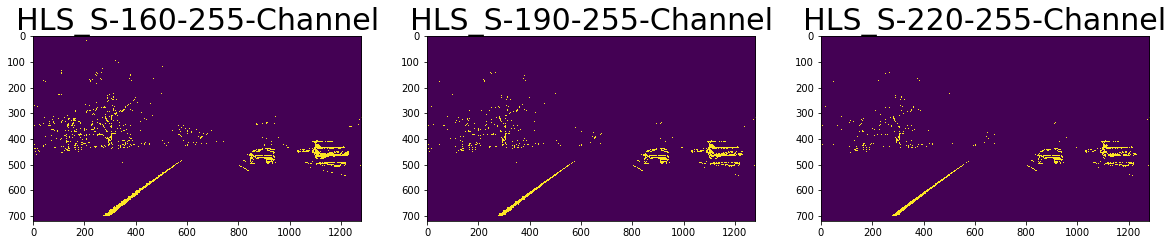

In [4]:
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    
    #It is best to test the threshold of that section.
    #Show Result
    fig, axs = plt.subplots(1,3, figsize=(20, 9))
    axs = axs.ravel()
    axs[0].imshow(HLS_S_threshold(image, threshold=(160, 255)))
    axs[0].set_title('HLS_S-160-255-Channel', fontsize=30)
    axs[1].imshow(HLS_S_threshold(image, threshold=(190, 255)))
    axs[1].set_title('HLS_S-190-255-Channel', fontsize=30)
    axs[2].imshow(HLS_S_threshold(image, threshold=(220, 255)))
    axs[2].set_title('HLS_S-220-255-Channel', fontsize=30)

### Gradients by Sobel Testing

In [5]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=5, thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, (orient=='x'), (orient=='y'), ksize= sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, (orient=='x'), (orient=='y'), ksize= sobel_kernel)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobelx)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, sobel_kernel)
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*gradmag/np.max(gradmag))
    # 5) Create a binary mask where mag thresholds are met
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    #plt.imshow(sxbinary, cmap='gray')
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return sxbinary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    scaled_sobel = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output

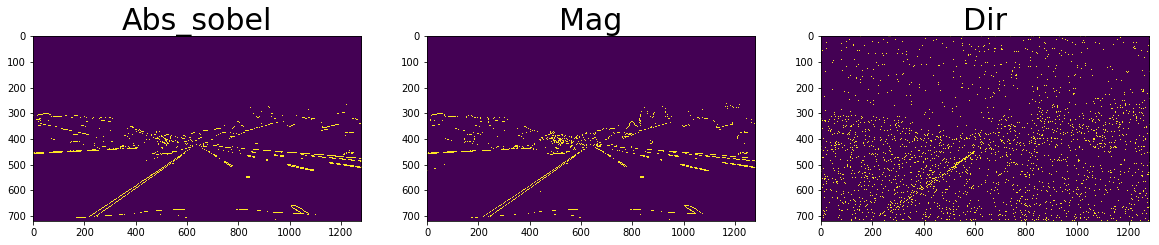

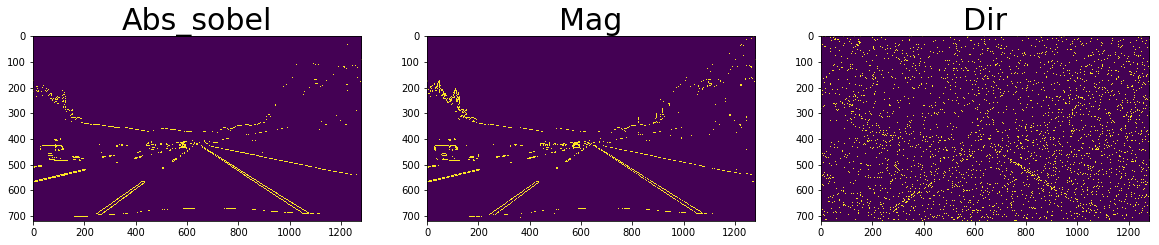

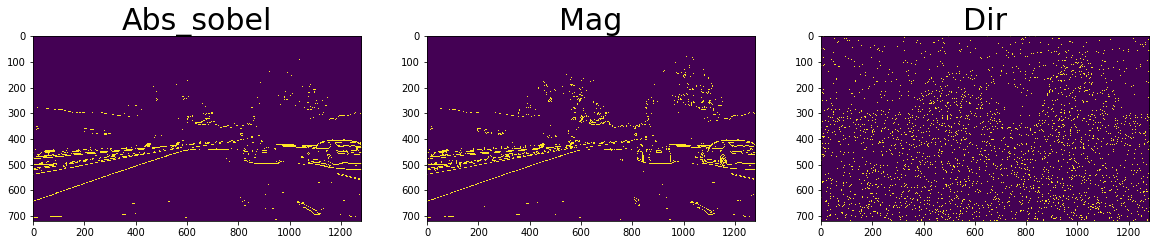

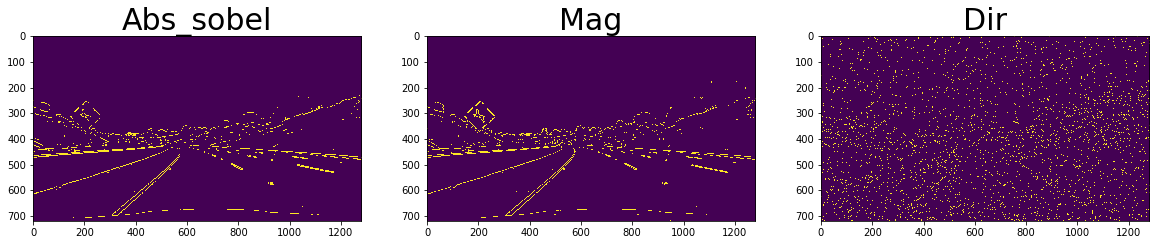

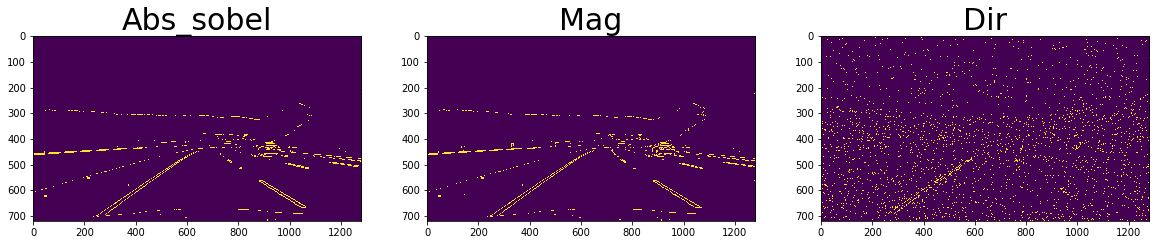

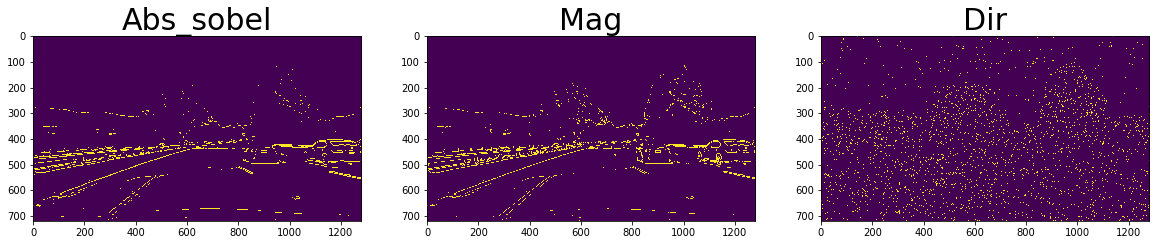

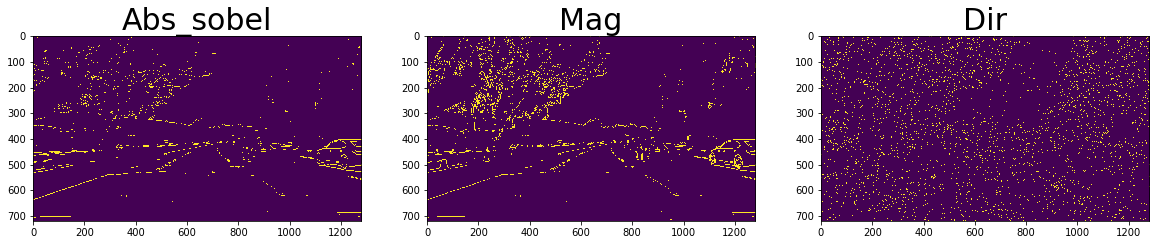

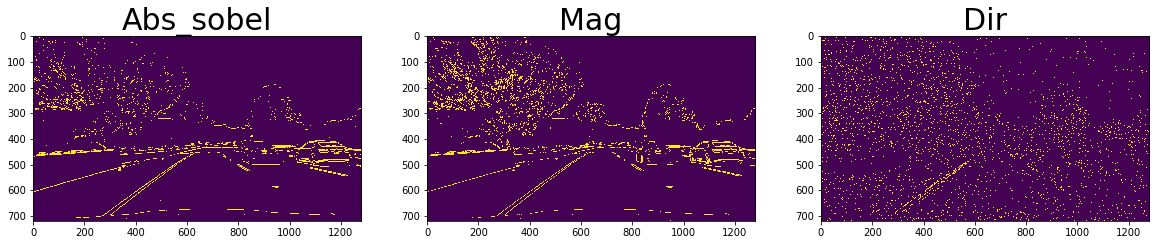

In [6]:
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    
    #Show Result
    fig, axs = plt.subplots(1,3, figsize=(20, 9))
    axs = axs.ravel()
    axs[0].imshow(abs_sobel_thresh(image,orient='y',thresh=(60, 255)))
    axs[0].set_title('Abs_sobel', fontsize=30)
    axs[1].imshow(mag_thresh(image,mag_thresh=(60, 255)))
    axs[1].set_title('Mag', fontsize=30)
    axs[2].imshow(dir_threshold(image,thresh=(0.9, 1)))
    axs[2].set_title('Dir', fontsize=30)

### Chiose Abs_sobel and Test the thresh

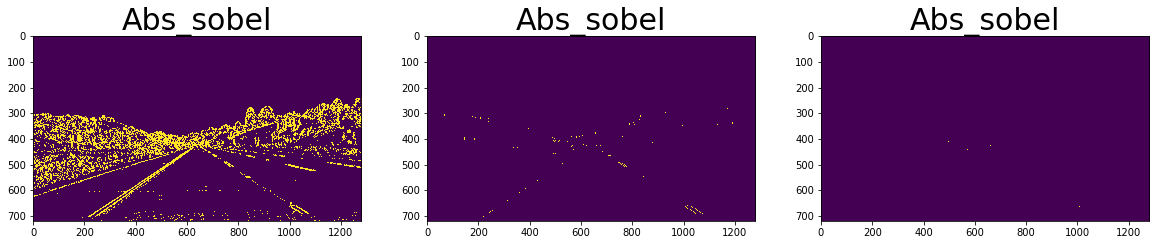

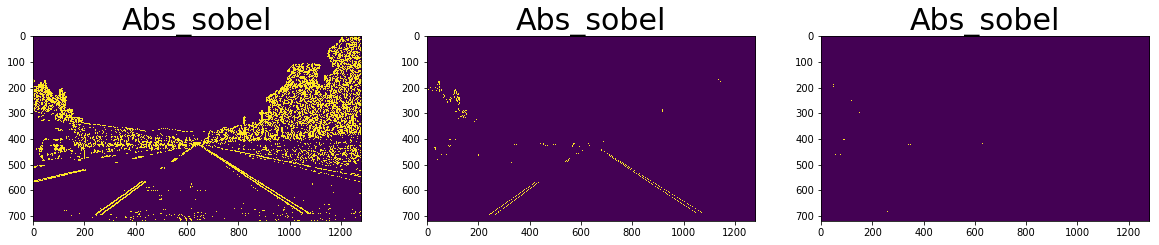

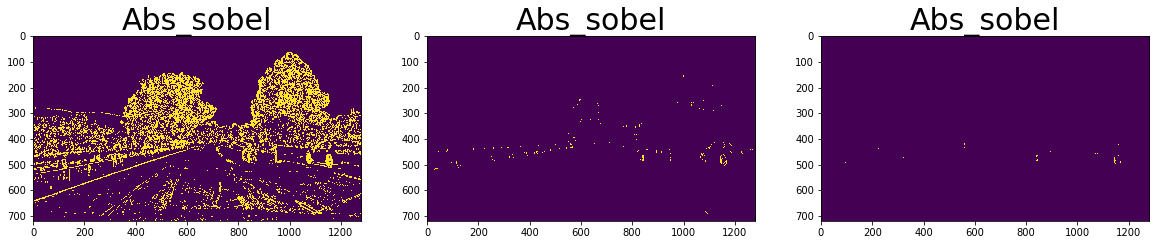

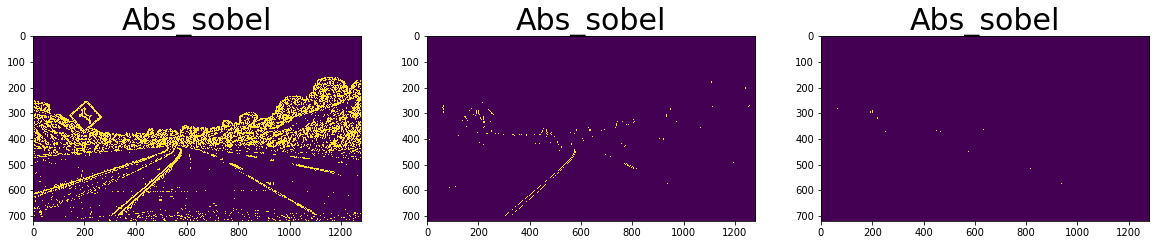

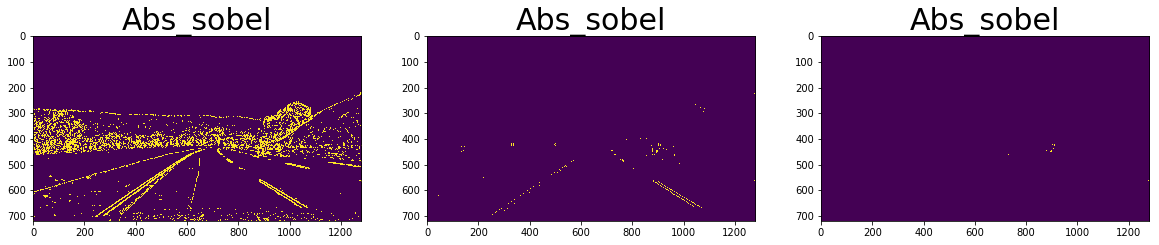

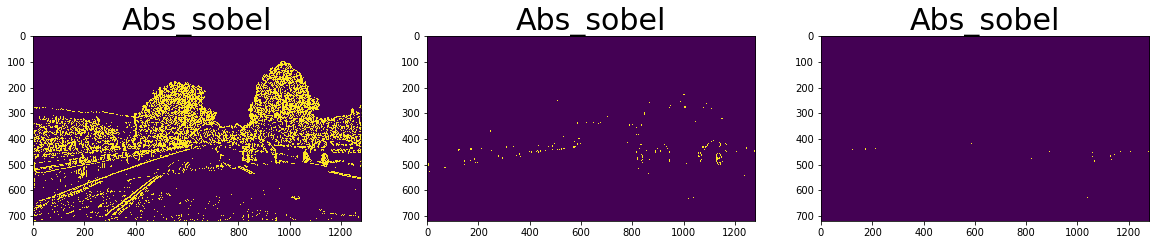

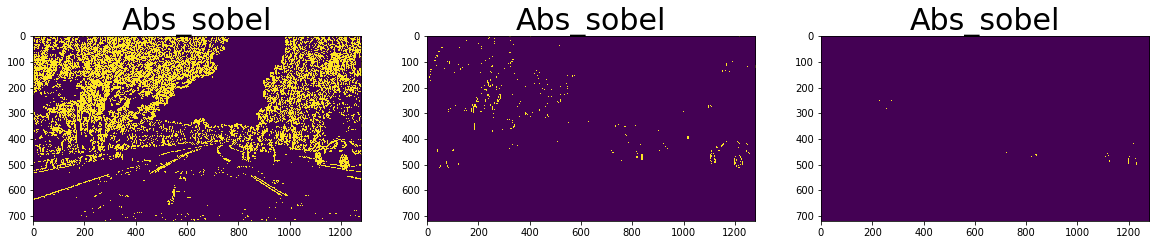

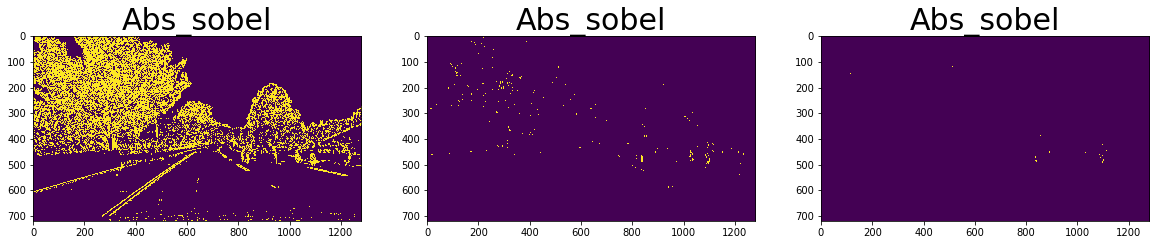

In [7]:
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    
    #Show Result
    fig, axs = plt.subplots(1,3, figsize=(20, 9))
    axs = axs.ravel()
    axs[0].imshow(abs_sobel_thresh(image,orient='x',thresh=(10, 255)))
    axs[0].set_title('Abs_sobel', fontsize=30)
    axs[1].imshow(abs_sobel_thresh(image,orient='x',thresh=(90, 255)))
    axs[1].set_title('Abs_sobel', fontsize=30)
    axs[2].imshow(abs_sobel_thresh(image,orient='x',thresh=(160, 255)))
    axs[2].set_title('Abs_sobel', fontsize=30)

### Chiose Abs_sobel 60-255 and combined

In [8]:
# Combine the two binary thresholds
def combine_binary(binary_image1, binary_image2):
    #Set RGB image for save image
    color_binary = np.zeros((binary_image2.shape[0],binary_image2.shape[1],3), np.uint8)
    color_binary[(binary_image1 == 1)] = (0,0,255)
    color_binary[(binary_image2 == 1)] = (0,255,0)
    
    
    combined_binary = np.zeros_like(binary_image2)
    combined_binary[(binary_image1 == 1) | (binary_image2 == 1)] = 1
    
    return combined_binary, color_binary

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

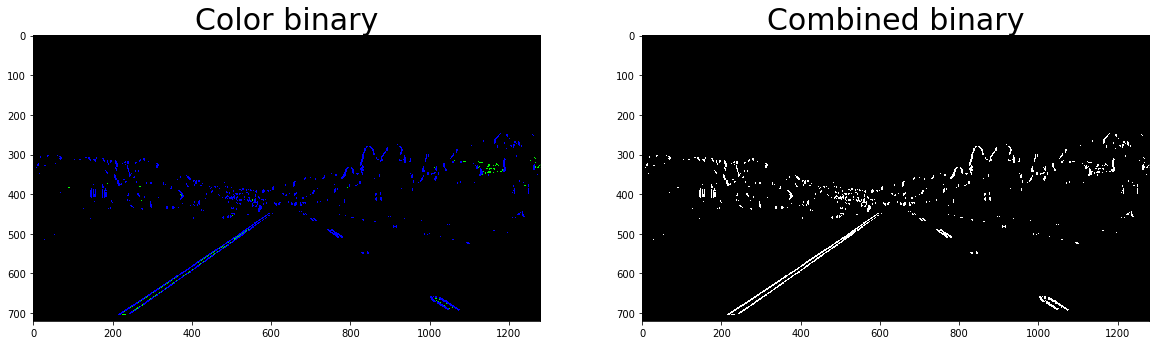

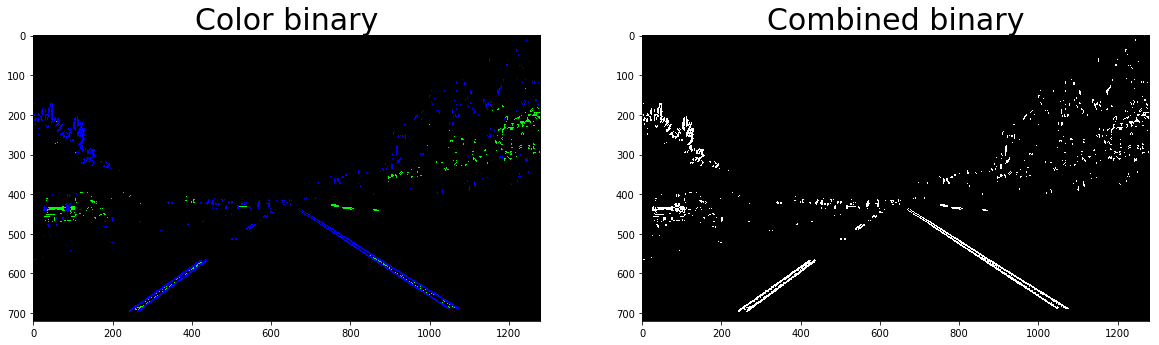

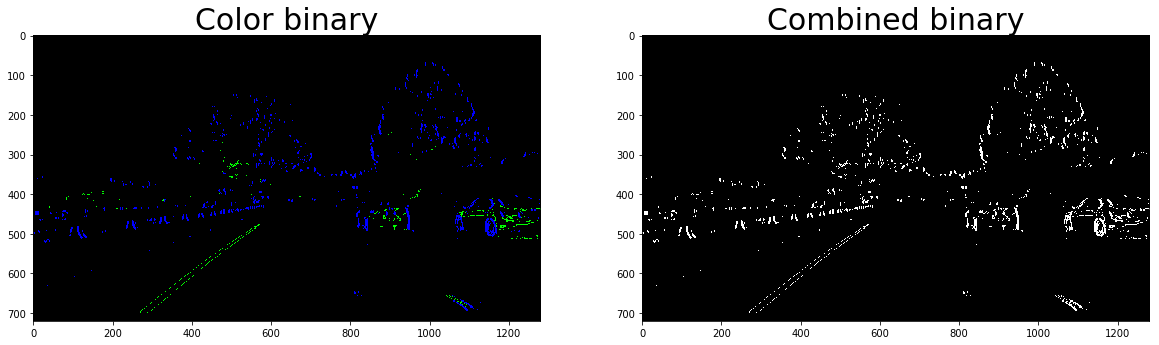

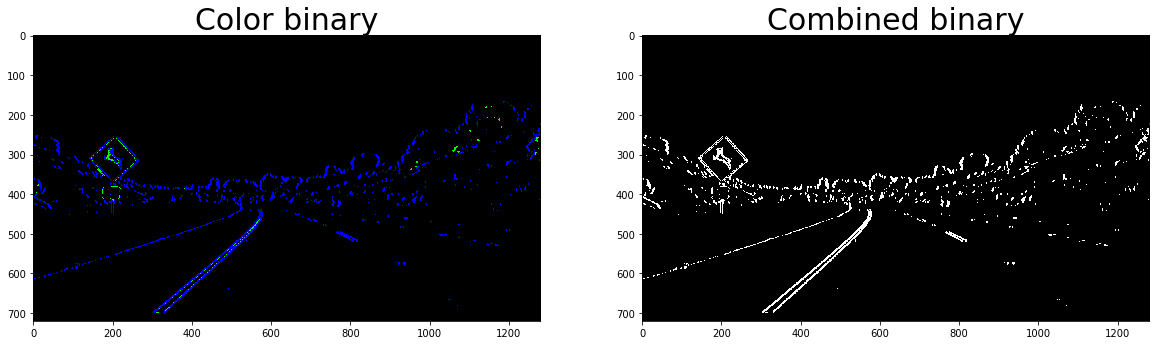

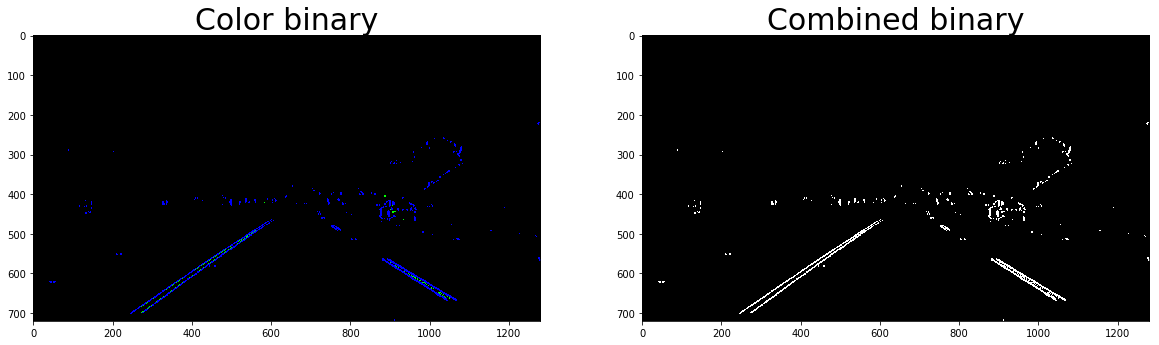

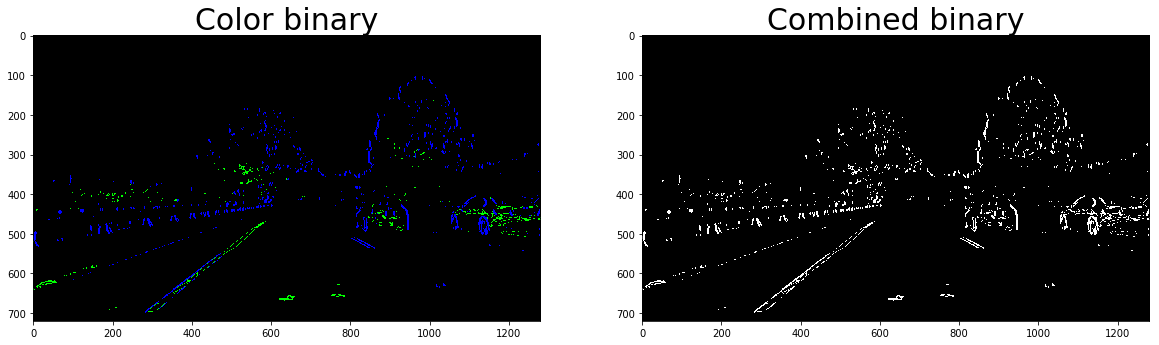

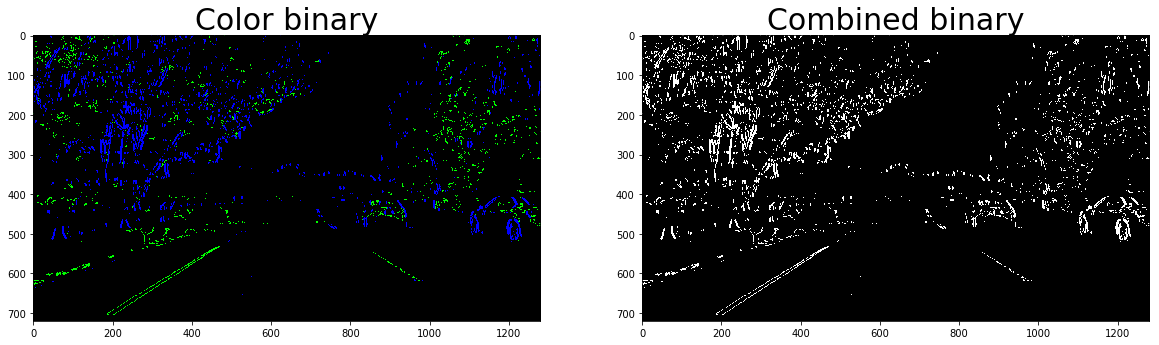

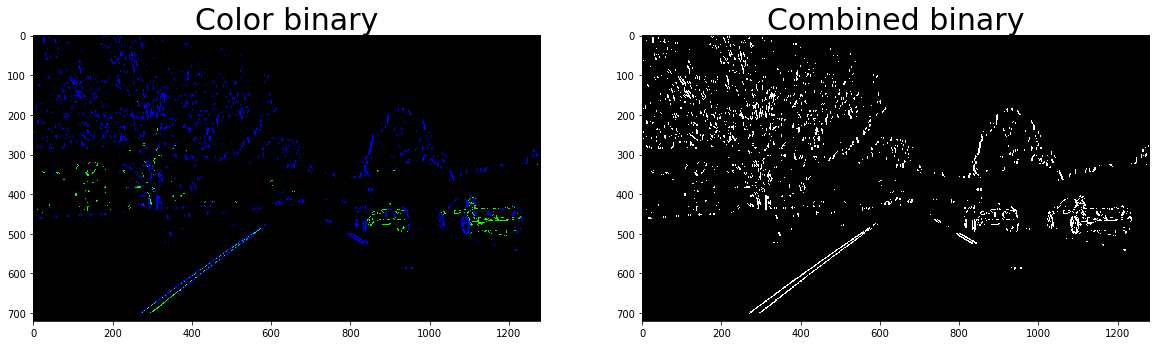

In [9]:
for image_name in os.listdir("output_images/Undistorted_Image/"):
    #read in each image
    image = mpimg.imread("output_images/Undistorted_Image/" + image_name)
    #Applies a Gaussian Noise kernel
    blur_image = gaussian_blur(image, kernel_size=7)
    
    binary_image1 = abs_sobel_thresh(blur_image,orient='x',thresh=(60, 255))
    
    binary_image2 = HLS_S_threshold(blur_image, threshold=(160, 190))
    
    combined_binary, color_binary = combine_binary(binary_image1, binary_image2)
    
    # Plotting thresholded images
    fig, axs = plt.subplots(1,2, figsize=(20, 9))
    axs = axs.ravel()
    axs[0].imshow(color_binary)
    axs[0].set_title('Color binary', fontsize=30)
    axs[1].imshow(combined_binary, cmap='gray')
    axs[1].set_title('Combined binary', fontsize=30)
    #Save image
    try:
        mpimg.imsave("output_images/Combined_binary/" + image_name,combined_binary)
    except FileNotFoundError:
        os.mkdir("./output_images/Combined_binary/")
        mpimg.imsave("output_images/Combined_binary/" + image_name,combined_binary)
        
    try:
        mpimg.imsave("output_images/Color_binary/" + image_name,color_binary)
    except FileNotFoundError:
        os.mkdir("./output_images/Color_binary/")
        mpimg.imsave("output_images/Color_binary/" + image_name,color_binary)